In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('train.csv', usecols = ['Age','Fare','Survived'])

In [6]:
df.dropna(inplace = True)   # Dropping all the rows for which some column data is missing

In [7]:
df.shape

(714, 3)

In [9]:
df.sample(3)

,Survived,Age,Fare
780,1,13.0,7.2292
131,0,20.0,7.0500
16,0,2.0,29.1250


In [10]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [12]:
X_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [13]:
# Applying binning/Discretization

kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [15]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [20]:
X_train_trf = trf.fit_transform(X_train)
X_test_trf = trf.transform(X_test)

In [21]:
output = pd.DataFrame({
    'age':X_train['Age'],
    'age_trf':X_train_trf[:,0],
    'fare':X_train['Fare'],
    'fare_trf':X_train_trf[:,1]
})

In [22]:
output['age_labels'] = pd.cut(x=X_train['Age'],
                                    bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] = pd.cut(x=X_train['Fare'],
                                    bins=trf.named_transformers_['second'].bin_edges_[0].tolist())



In [23]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_labels,fare_labels
770,24.0,5.0,9.5000,4.0,"(23.0, 25.0]","(8.158, 10.5]"
661,40.0,11.0,7.2250,0.0,"(38.0, 42.0]","(0.0, 7.25]"
318,31.0,8.0,164.8667,14.0,"(30.0, 32.0]","(108.9, 512.329]"
488,30.0,8.0,8.0500,3.0,"(28.0, 30.0]","(7.896, 8.158]"
553,22.0,4.0,7.2250,0.0,"(21.0, 23.0]","(0.0, 7.25]"


In [25]:
clf = DecisionTreeClassifier()
clf.fit(X_train_trf,y_train)
y_pred2 = clf.predict(X_test_trf)

In [26]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [27]:
X_trf = trf.fit_transform(X)
np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy'))

0.630320813771518

**Writing the entir code in one function and also plotting graph for the same (before and after binning graph)**

In [29]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal',strategy=strategy)
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    X_trf = trf.fit_transform(X)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),X,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(X['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(X_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

0.6261345852895148


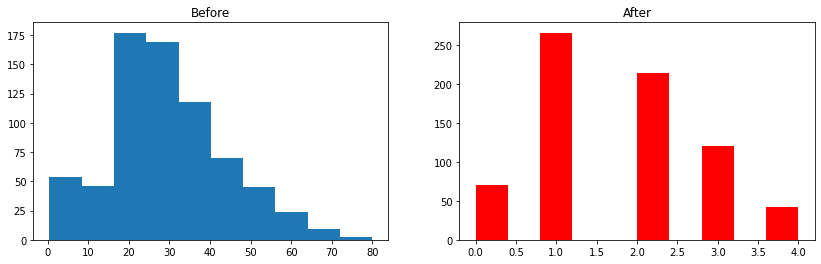

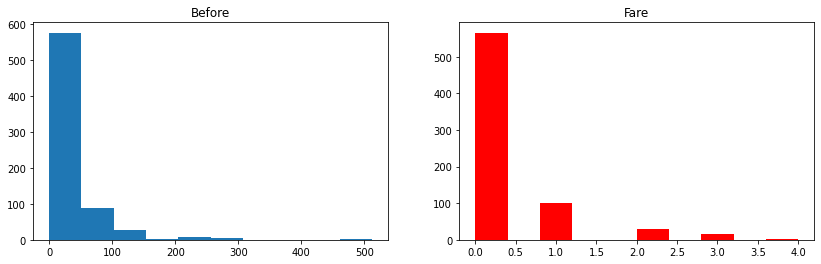

In [31]:
# Uniform binning
discretize(5,'kmeans')

0.6303403755868545


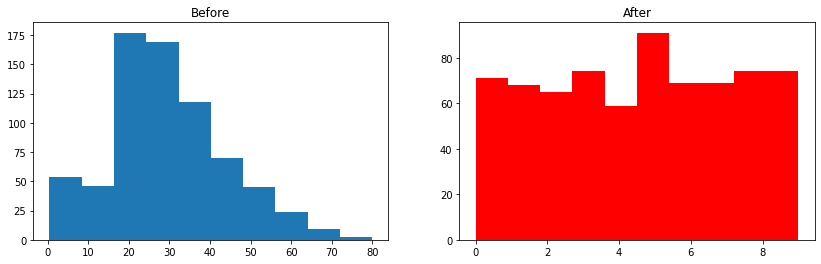

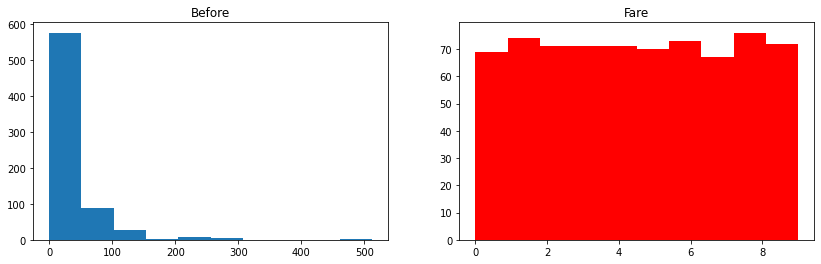

In [32]:
# Quantile binning
discretize(10,'quantile')
